In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import matplotlib
import statsmodels
import tensorflow as tf

C:\Users\hirot\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(pd.__version__)
print(matplotlib.__version__)
print(statsmodels.__version__)
print(tf.__version__)

1.3.4
3.4.3
0.12.2
2.12.0


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
accident2019 = pd.read_csv("Data/honhyo_2019.csv", encoding="Shift-JIS")
accident_additional_2019 = pd.read_csv("Data/hojuhyo_2019.csv", encoding="Shift-JIS")
accident_motorway_2019 = pd.read_csv("Data/kosokuhyo_2019.csv", encoding="Shift-JIS")

In [5]:
accident2020 = pd.read_csv("Data/honhyo_2020.csv", encoding="Shift-JIS")
accident_additional_2020 = pd.read_csv("Data/hojuhyo_2020.csv", encoding="Shift-JIS")
accident_motorway_2020 = pd.read_csv("Data/kosokuhyo_2020.csv", encoding="Shift-JIS")

In [6]:
accident2021 = pd.read_csv("Data/honhyo_2021.csv", encoding="Shift-JIS")
accident_additional_2021 = pd.read_csv("Data/hojuhyo_2021.csv", encoding="Shift-JIS")
accident_motorway_2021 = pd.read_csv("Data/kosokuhyo_2021.csv", encoding="Shift-JIS")

In [7]:
accident_all = pd.concat([accident2019,accident2020,accident2021])
accident_all.shape

(995611, 58)

In [8]:
accident2019["date"] = pd.to_datetime({"year":accident2019["発生日時　　年"],"month":accident2019["発生日時　　月"],
                                       "day":accident2019["発生日時　　日"]})
accident_all["date"] = pd.to_datetime({"year":accident_all["発生日時　　年"],"month":accident_all["発生日時　　月"],
                                       "day":accident_all["発生日時　　日"]})

In [9]:
accident2019.head()

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,...,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),date
0,1,10,59,1,2,0,1,40030,2,0,...,2,2,2,4,4,431412959,1414947029,6,3,2018-12-28
1,1,10,59,2,2,0,2,40020,2,0,...,2,2,2,4,4,425706029,1413039991,1,3,2019-01-06
2,1,10,59,3,2,0,1,50020,1,0,...,2,2,2,4,4,424115557,1414158530,3,3,2018-12-18
3,1,10,59,4,2,0,1,40020,2,0,...,1,2,2,4,2,425647051,1413100440,7,3,2019-01-05
4,1,10,59,5,2,0,1,40140,2,0,...,2,2,2,4,2,425606992,1420518034,2,2,2018-12-31


In [10]:
accident2019.shape

(381237, 59)

In [11]:
ts = accident_all[["date","資料区分"]].groupby("date").count()
ts["資料区分"].sum()

995611

In [12]:
ts.columns=["accident_num"]

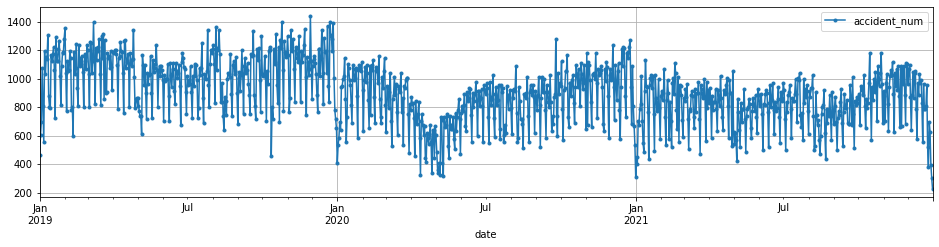

In [13]:
ts["2019-01":"2022-12"].plot(grid=True, marker=".", figsize=(16, 3.5))
plt.show()

In [14]:
# Predict 1 month's data for prediction
start_date, end_date = "2019-01-01", "2021-11-30"
time_period = pd.date_range(start_date, end_date)
accident_series = ts.loc[time_period]["accident_num"].asfreq("D")
model = ARIMA(accident_series[time_period], # training data
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 7))
model = model.fit()
y_preds = model.forecast(31) #predicting daat

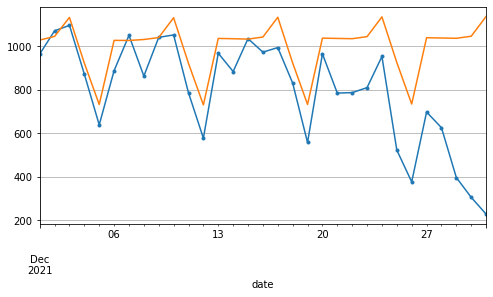

MAE: 208.18315087820116
MAPE: 45.74427499186698
RMSE: 299.377433361241


In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
start_date, end_date = "2021-12-01", "2021-12-31"
time_period = pd.date_range(start_date, end_date)
accident_series = ts.loc[time_period]["accident_num"].asfreq("D")
accident_series[time_period].plot(ax=ax, marker=".")
y_preds.plot(ax=ax, grid=True, legend=False)
plt.show()
mae = (y_preds - accident_series[time_period]).abs().mean()
mape = 100*((y_preds - accident_series[time_period])/accident_series[time_period]).abs().mean()
rmse = ((y_preds - accident_series[time_period])**2).mean()**0.5

print("MAE: "+str(mae))
print("MAPE: "+str(mape))
print("RMSE: "+str(rmse))

In [16]:
# Grid Search
# Predict 1 month's data for prediction

mae_list = []
for p in range(3):
    for d in range(3):
        for q in range(3):
            start_date, end_date = "2019-01-01", "2021-11-30"
            time_period = pd.date_range(start_date, end_date)
            accident_series = ts.loc[time_period]["accident_num"].asfreq("D")
            model = ARIMA(accident_series[time_period],
                order=(p, d, q),
                seasonal_order=(p, d, q, 7))
            model = model.fit()
            y_preds = model.forecast(31)
            start_date, end_date = "2021-12-01", "2021-12-31"
            time_period = pd.date_range(start_date, end_date)
            accident_series = ts.loc[time_period]["accident_num"].asfreq("D")
            mae = (y_preds - accident_series[time_period]).abs().mean()
            print(p,d,q,mae)

0 0 0 195.0227154027051
0 0 1 189.56935457105374
0 0 2 188.29664740248768
0 1 0 1391.3548387096741
0 1 1 227.1622690418987
0 1 2 208.02330629559208
0 2 0 47570.22580645178
0 2 1 1482.6752149779184
0 2 2 282.4430444602039
1 0 0 182.80872194084589
1 0 1 166.74797571988663
1 0 2 170.26017620714197
1 1 0 615.8007708719534
1 1 1 208.18315087820116
1 1 2 190.42945620000458
1 2 0 18005.582535542588
1 2 1 673.4439109308178
1 2 2 329.67288224588594
2 0 0 192.51734825317934
2 0 1 203.50846120324218
2 0 2 177.56521799443118
2 1 0 427.3803322241276
2 1 1 191.2185571610188
2 1 2 190.48721815535694
2 2 0 6690.778152670484
2 2 1 471.4513965834505
2 2 2 326.39678826847256


In [17]:
# Predict 1 month's data for prediction
start_date, end_date = "2019-01-01", "2021-11-30"
time_period = pd.date_range(start_date, end_date)
accident_series = ts.loc[time_period]["accident_num"].asfreq("D")
model = ARIMA(accident_series[time_period], # training data
    order=(1, 0, 1),
    seasonal_order=(1, 0, 1, 7))
model = model.fit()
y_preds = model.forecast(31) #predicting daat

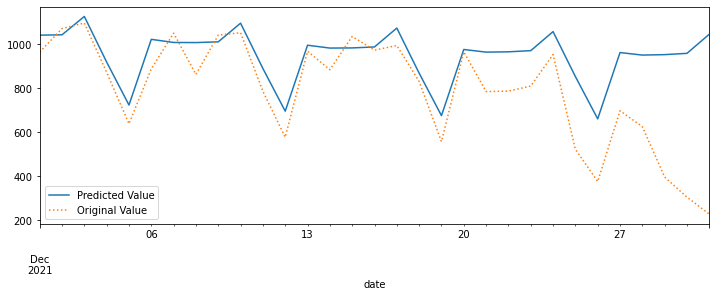

MAE: 166.74797571988663
MAPE: 38.098086131562475
RMSE: 253.10980010414823


In [18]:
fig, ax = plt.subplots(figsize=(12, 4))
start_date, end_date = "2021-12-01", "2021-12-31"
time_period = pd.date_range(start_date, end_date)
accident_series = ts.loc[time_period]["accident_num"].asfreq("D")
y_preds.plot(ax=ax, grid=True, legend=True, label='Predicted Value')
accident_series[time_period].plot(ax=ax, linestyle=":",legend=True, label='Original Value')
plt.show()
mae = (y_preds - accident_series[time_period]).abs().mean()
mape = 100*((y_preds - accident_series[time_period])/accident_series[time_period]).abs().mean()
rmse = ((y_preds - accident_series[time_period])**2).mean()**0.5

print("MAE: "+str(mae))
print("MAPE: "+str(mape))
print("RMSE: "+str(rmse))